# TensorFlow Basic

In [1]:
# initial setup
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
#assert tf.__version__ >= "2.4"
import numpy as np
import os
np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

2.18.0


## tensor and operation - basic

In [2]:
tf.constant([[1.,2,3],[4,5,6]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
t = tf.constant([[1.,2,3],[4,5,6]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [5]:
t.shape

TensorShape([2, 3])

In [6]:
t.dtype

tf.float32

In [7]:
t[:,1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

In [8]:
t[:,1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [9]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [10]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [11]:
t @ tf.transpose( t )

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [12]:
from tensorflow import keras
K = keras.backend
K.transpose(t)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)>

In [13]:
K.square( K.transpose(t) )

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1., 16.],
       [ 4., 25.],
       [ 9., 36.]], dtype=float32)>

In [14]:
a = np.array([2., 5, 7])
a

array([2., 5., 7.])

In [15]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 5., 7.])>

In [16]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [17]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [18]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 25., 49.])>

In [19]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

In [20]:
try :
    tf.constant(10.0) + tf.constant(10)
except tf.errors.InvalidArgumentError as ex :
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 


In [21]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 


In [22]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [23]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [24]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [25]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [26]:
b = tf.strings.unicode_encode(u, "UTF-8")
b

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [27]:
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [28]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [29]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [30]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [31]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>

In [32]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>


In [33]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [34]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [35]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
r2

<tf.RaggedTensor [[65, 66], [], [67]]>

In [36]:
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [37]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71],
 [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [38]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [39]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]])>

In [40]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [41]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [42]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [43]:
s2 = s * 2.0
s2

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

In [44]:
tf.sparse.to_dense(s2)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 0., 0.],
       [4., 0., 0., 0.],
       [0., 0., 0., 6.]], dtype=float32)>

In [45]:
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [46]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
print(tf.sparse.to_dense(s))
print(s4)
tf.sparse.sparse_dense_matmul(s, s4)

tf.Tensor(
[[0. 1. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 3.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[10. 20.]
 [30. 40.]
 [50. 60.]
 [70. 80.]], shape=(4, 2), dtype=float32)


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [47]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [48]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

{{function_node __wrapped__SparseToDense_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense] name: 


In [49]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [50]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]])>

In [51]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [52]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

In [53]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [54]:
v.assign(2 * v)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [55]:
v[0, 1].assign(42)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [56]:
v[:, 2].assign([0., 1.])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [57]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [58]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates=[100., 200.])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [59]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
sparse_delta

In [60]:
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

In [61]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))
print(array)

In [62]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [63]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [64]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
print(mean)
print(variance)

tf.Tensor([2. 3.], shape=(2,), dtype=float32)
tf.Tensor([4.6666665 8.666667 ], shape=(2,), dtype=float32)


## User defined loss function

In [65]:
# load, split, and scale data
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [66]:
# user defined loss function
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

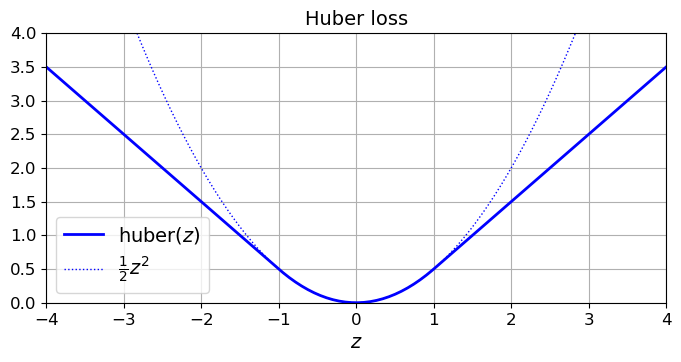

In [67]:
# plot the loss function
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [68]:
# define the model
input_shape = X_train.shape[1:]
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

C:\Users\cjoo2\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - loss: 1.1253 - mae: 1.5366 - val_loss: 0.2102 - val_mae: 0.5044
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.2225 - mae: 0.5205 - val_loss: 0.2038 - val_mae: 0.4895


## Save Load model

In [70]:
model.save("./data/my_model_with_a_custom_loss.keras")
model = keras.models.load_model("./data/my_model_with_a_custom_loss.keras",
                                custom_objects={"huber_fn": huber_fn})

In [71]:
# continue training
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2091 - mae: 0.5013 - val_loss: 0.2024 - val_mae: 0.4838
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.2028 - mae: 0.4910 - val_loss: 0.1889 - val_mae: 0.4661


In [72]:
# change the threshold
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [73]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2242 - mae: 0.4869 - val_loss: 0.1972 - val_mae: 0.4529
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.2176 - mae: 0.4798 - val_loss: 0.2102 - val_mae: 0.4560


In [74]:
model.save("./data/my_model_with_a_custom_loss_threshold_2.keras")

In [75]:
model = keras.models.load_model("./data/my_model_with_a_custom_loss_threshold_2.keras",
                                custom_objects={"huber_fn": create_huber(2.0)})
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2126 - mae: 0.4736 - val_loss: 0.2297 - val_mae: 0.4627
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.2088 - mae: 0.4684 - val_loss: 0.2064 - val_mae: 0.4490


In [76]:
# OOP
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3675 - mae: 1.3864 - val_loss: 0.7038 - val_mae: 0.7437
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.2750 - mae: 0.5389 - val_loss: 0.6044 - val_mae: 0.6814


In [77]:
# Save and Load model
model.save("./data/my_model_with_a_custom_loss_class.keras")
model = keras.models.load_model("./data/my_model_with_a_custom_loss_class.keras",
                                custom_objects={"HuberLoss": HuberLoss})
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2547 - mae: 0.5187 - val_loss: 0.5165 - val_mae: 0.6326
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.2450 - mae: 0.5094 - val_loss: 0.4325 - val_mae: 0.5877


In [78]:
model.loss.threshold

2.0

## More User Defined function

In [79]:
# setup
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# functions
def my_softplus(z): # return tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

#def my_l1_regularizer(weights):
#    return tf.reduce_sum(tf.abs(0.01 * weights))

my_l1_regularizer = tf.keras.regularizers.L1(l1=0.01)

#def my_positive_weights(weights): # return tf.nn.relu(weights)
#    return tf.where(weights < 0., tf.zeros_like(weights), weights)

my_positive_weights = tf.keras.constraints.NonNeg()

In [80]:
# def model
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [81]:
# compile and train
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - loss: 2.1495 - mae: 1.1394 - val_loss: 1.1447 - val_mae: 0.5464
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.6523 - mae: 0.5371 - val_loss: 0.9405 - val_mae: 0.4905


In [82]:
# save the model
model.save("./data/my_model_with_many_custom_parts.keras")

In [83]:
# load model
model = keras.models.load_model(
    "./data/my_model_with_many_custom_parts.keras",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [84]:
# regularizer by class
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

# define model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [85]:
# compile and run
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4743 - mae: 1.1411 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.8640 - mae: 0.5591 - val_loss: inf - val_mae: inf


In [86]:
# save and load
model.save("./data/my_model_with_many_custom_parts.keras")

model = keras.models.load_model(
    "./data/my_model_with_many_custom_parts.keras",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [87]:
# compile and run
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7105 - mae: 0.5266 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 0.6386 - mae: 0.5106 - val_loss: inf - val_mae: inf


## User defined paramter (charactoristic)

In [88]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# define model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

# compile - loss is mse and the paramter is cread_huber
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

# train
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - huber_fn: 1.4851 - loss: 3.7515
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - huber_fn: 0.2679 - loss: 0.6154


In [89]:
# compare "loss" and "huber_fn"
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - huber_fn: 0.2440 - loss: 0.1217
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - huber_fn: 0.2335 - loss: 0.1164


(0.11491641402244568, 0.11548991157165779)

### Streaming parameter - pass

## User defined layer

In [90]:
# define layer
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))
exponential_layer(tf.constant([-1.0, 0, 1]))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [91]:
# setup
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# def model, complie, train, evaluate
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 6.2480 - val_loss: 5.4560
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 5.7819 - val_loss: 5.4559
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 5.7819 - val_loss: 5.4559
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 5.7818 - val_loss: 5.4559
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 5.7818 - val_loss: 5.4559
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 5.5899


5.579679489135742

In [92]:
# define class
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(list(batch_input_shape)[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2


C:\Users\cjoo2\AppData\Local\Temp\ipykernel_16100\2309624672.py:4: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - loss: 3.4399 - val_loss: 0.7275
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.6967 - val_loss: 0.5220
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 0.5284


0.5277359485626221

In [93]:
# save and load the model
model.save("./data/my_model_with_a_custom_layer.keras")
model = keras.models.load_model("./data/my_model_with_a_custom_layer.keras",
                                custom_objects={"MyDense": MyDense})

In [94]:
# def multilayer
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape: ", X1.shape ," X2.shape: ", X2.shape) # 사용자 정의 층 디버깅
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2)) # the first input is None for call

In [95]:
def split_data(data):
    columns_count = data.shape[-1]
    half = columns_count // 2
    return data[:, :half], data[:, half:]

X_train_scaled_A, X_train_scaled_B = split_data(X_train_scaled)
X_valid_scaled_A, X_valid_scaled_B = split_data(X_valid_scaled)
X_test_scaled_A, X_test_scaled_B = split_data(X_test_scaled)

# data size
X_train_scaled_A.shape, X_train_scaled_B.shape

((11610, 4), (11610, 4))

In [96]:
outputs1, outputs2 = MyMultiLayer()((X_train_scaled_A, X_train_scaled_B))

X1.shape:  (11610, 4)  X2.shape:  (11610, 4)


In [114]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=X_train_scaled_A.shape)
input_B = keras.layers.Input(shape=X_train_scaled_B.shape)
hidden_A, hidden_B = MyMultiLayer()((input_A, input_B))
hidden_A = keras.layers.Dense(30, activation='selu')(hidden_A)
hidden_B = keras.layers.Dense(30, activation='selu')(hidden_B)
concat = keras.layers.Concatenate()((hidden_A, hidden_B))
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])